In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D  # For custom legend lines

def custom_transform(y):
    # 0-60 maps to 0-3
    # 60-67 maps to 3-20
    # 67-100 maps to 20-21
    return np.where(y < 60, y * 3 / 60,
                    np.where(y < 67, 3 + (y - 60) * 17 / (67 - 60), 20 + (y - 67) * 1 / (100 - 67)))

def inverse_custom_transform(y):
    # Inverse transformation, mapping 0-3 back to 0-60
    # Mapping 3-20 back to 60-67
    # Mapping 20-21 back to 67-100
    return np.where(y < 3, y * 60 / 3,
                    np.where(y < 20, 60 + (y - 3) * (67 - 60) / 17, 67 + (y - 20) * (100 - 67) / 1))



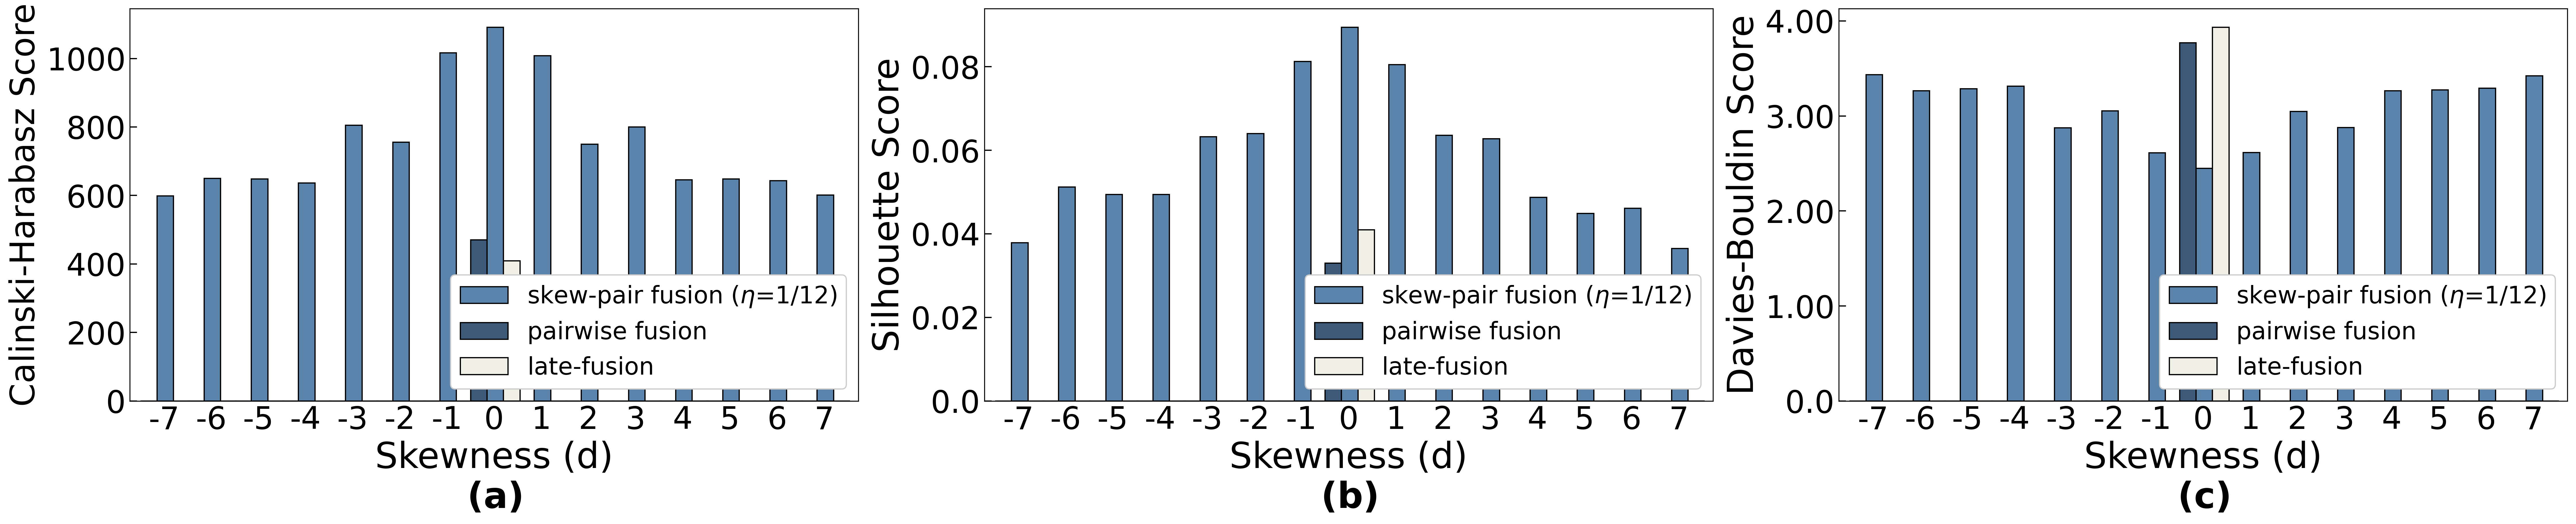

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 定义颜色
colors = [
    '#3C5A78',
    '#5B84AD',
    '#F1F0E7',
]

# 设置图形大小，保证每个子图大小与原图相同
fig, axes = plt.subplots(1, 3, figsize=(30, 6.18), dpi=300)

# 图表1数据
data1a = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [0, 0, 0, 0, 0, 0, 0, 470, 0, 0, 0, 0, 0, 0, 0]
}
df1a = pd.DataFrame(data1a)

data2a = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [598.77, 650.14, 648.5, 636.7, 805.1, 755.32, 1016.79, 1091, 1008, 750, 800, 646, 648, 643, 601]
}
df2a = pd.DataFrame(data2a)

data3a = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [0, 0, 0, 0, 0, 0, 0, 409, 0, 0, 0, 0, 0, 0, 0]
}
df3a = pd.DataFrame(data3a)

# 图表2数据
data1b = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [0, 0, 0, 0, 0, 0, 0, 0.03296943, 0, 0, 0, 0, 0, 0, 0]
}
df1b = pd.DataFrame(data1b)

data2b = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [0.037834566, 0.051196896, 0.049391188, 0.049391188, 0.06322599, 0.06398907, 0.08122401, 0.08942863, 0.080524795, 0.06358373, 0.06278545, 0.04870643, 0.04491172, 0.046124537, 0.036487494]
}
df2b = pd.DataFrame(data2b)

data3b = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [0, 0, 0, 0, 0, 0, 0, 0.040966168, 0, 0, 0, 0, 0, 0, 0]
}
df3b = pd.DataFrame(data3b)

# 图表3数据
data1c = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [0, 0, 0, 0, 0, 0, 0, 3.769, 0, 0, 0, 0, 0, 0, 0]
}
df1c = pd.DataFrame(data1c)

data2c = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [3.434, 3.265, 3.286, 3.313, 2.874, 3.054, 2.612, 2.449, 2.616, 3.048, 2.879, 3.266, 3.273, 3.292, 3.421]
}
df2c = pd.DataFrame(data2c)

data3c = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [0, 0, 0, 0, 0, 0, 0, 3.933, 0, 0, 0, 0, 0, 0, 0]
}
df3c = pd.DataFrame(data3c)

# 图表1绘制
ax = axes[0]
width = 0.35
space = 0.05
r1 = np.arange(len(df1a['skewness']))
r2 = [x + width + space for x in r1]
r3 = [x + width for x in r2]

ax.bar(r1 + 0.05, df1a['roc_auc'], color=colors[0], width=width, label='pairwise fusion', edgecolor='black', linewidth=1)
ax.bar(r2, df2a['roc_auc'], color=colors[1], width=width, label='skew-pair fusion ($\\eta$=1/12)', edgecolor='black', linewidth=1)
ax.bar(r3, df3a['roc_auc'], color=colors[2], width=width, label='late-fusion', edgecolor='black', linewidth=1)

ax.set_xlabel('Skewness (d)\n$\mathbf{(a)}$', fontsize=30)
ax.set_ylabel('Calinski-Harabasz Score', fontsize=28)
ax.set_xticks([r + width + (space / 2) for r in range(len(df1a['skewness']))])
ax.set_xticklabels(df1a['skewness'])
ax.set_xlim(min(r1) - 0.35, max(r3) + 0.35)

handles, labels = ax.get_legend_handles_labels()
order = [1, 0, 2]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], frameon=True, loc='lower right', fontsize=20, framealpha=1.0)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.0f}"))
ax.tick_params(axis='both', which='both', direction='in', length=6, width=1, labelsize=26)
ax.tick_params(axis='x', which='both', bottom=False)

# 图表2绘制
ax = axes[1]
r1 = np.arange(len(df1b['skewness']))
r2 = [x + width + space for x in r1]
r3 = [x + width for x in r2]

ax.bar(r1 + 0.05, df1b['roc_auc'], color=colors[0], width=width, label='pairwise fusion', edgecolor='black', linewidth=1)
ax.bar(r2, df2b['roc_auc'], color=colors[1], width=width, label='skew-pair fusion ($\\eta$=1/12)', edgecolor='black', linewidth=1)
ax.bar(r3, df3b['roc_auc'], color=colors[2], width=width, label='late-fusion', edgecolor='black', linewidth=1)

ax.set_xlabel('Skewness (d)\n$\mathbf{(b)}$', fontsize=30)
ax.set_ylabel('Silhouette Score', fontsize=30)
ax.set_xticks([r + width + (space / 2) for r in range(len(df1b['skewness']))])
ax.set_xticklabels(df1b['skewness'])
ax.set_xlim(min(r1) - 0.35, max(r3) + 0.35)

handles, labels = ax.get_legend_handles_labels()
order = [1, 0, 2]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], frameon=True, loc='lower right', fontsize=20, framealpha=1.0)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}" if x > 0 else f"{x:.1f}"))
ax.tick_params(axis='both', which='both', direction='in', length=6, width=1, labelsize=26)
ax.tick_params(axis='x', which='both', bottom=False)

# 图表3绘制
ax = axes[2]
r1 = np.arange(len(df1c['skewness']))
r2 = [x + width + space for x in r1]
r3 = [x + width for x in r2]

ax.bar(r1 + 0.05, df1c['roc_auc'], color=colors[0], width=width, label='pairwise fusion', edgecolor='black', linewidth=1)
ax.bar(r2, df2c['roc_auc'], color=colors[1], width=width, label='skew-pair fusion ($\\eta$=1/12)', edgecolor='black', linewidth=1)
ax.bar(r3, df3c['roc_auc'], color=colors[2], width=width, label='late-fusion', edgecolor='black', linewidth=1)

ax.set_xlabel('Skewness (d)\n$\mathbf{(c)}$', fontsize=30)
ax.set_ylabel('Davies-Bouldin Score', fontsize=30)
ax.set_xticks([r + width + (space / 2) for r in range(len(df1c['skewness']))])
ax.set_xticklabels(df1c['skewness'])
ax.set_xlim(min(r1) - 0.35, max(r3) + 0.35)

handles, labels = ax.get_legend_handles_labels()
order = [1, 0, 2]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], frameon=True, loc='lower right', fontsize=20, framealpha=1.0)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}" if x > 0 else f"{x:.1f}"))
ax.tick_params(axis='both', which='both', direction='in', length=6, width=1, labelsize=26)
ax.tick_params(axis='x', which='both', bottom=False)

# 调整布局并保存图形
plt.tight_layout()

plt.savefig('C:/Users/rzc/Desktop/fig/svg/Figure 9.svg', format='svg')
plt.savefig('C:/Users/rzc/Desktop/fig/png/Figure 9.png', format='png')
plt.savefig('C:/Users/rzc/Desktop/fig/jpeg/Figure 9.jpeg', format='jpeg')
plt.savefig('C:/Users/rzc/Desktop/fig/tif/Figure 9.tif', format='tif')
plt.show()

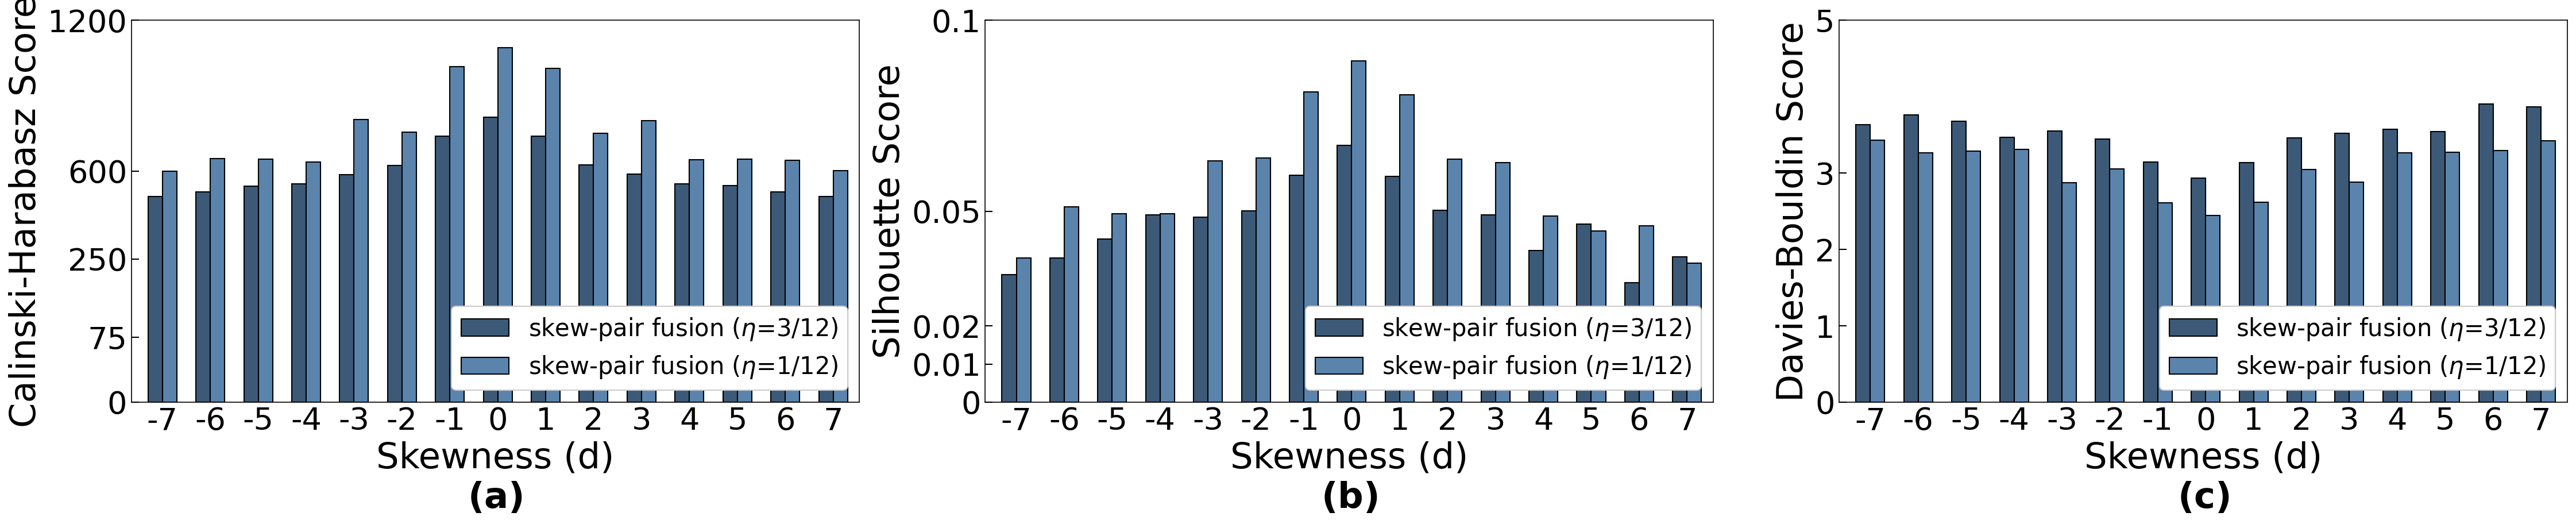

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def custom_transform(y):
    # 0-68 maps to 0-3
    # 68-80 maps to 3-20
    # 80-100 maps to 20-21
    return np.where(y < 68, y * 3 / 68,
                    np.where(y < 80, 3 + (y - 68) * 17 / (80 - 68), 20 + (y - 80) * 1 / (100 - 80)))

def inverse_custom_transform(y):
    # Inverse transformation, mapping 0-3 back to 0-68
    # Mapping 3-20 back to 68-80
    # Mapping 20-21 back to 80-100
    return np.where(y < 3, y * 68 / 3,
                    np.where(y < 20, 68 + (y - 3) * (80 - 68) / 17, 80 + (y - 20) * (100 - 80) / 1))

# Updated color scheme
colors = [
    '#3C5A78',
    '#5B84AD',
    '#F1F0E7',
]

# Create a figure with three subplots arranged horizontally
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 6.18), dpi=150)

# Plot 1
data1 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [497.75,516.37,539.54,549.69,584.80,622.75,739.86,815.47,738.13,624.63,589.18,548.56,541.27,517.57,498.08]
}
df1 = pd.DataFrame(data1)

data2 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [598.77, 650.14, 648.5, 636.7, 805.1, 755.32, 1016.79, 1091, 1008, 750, 800, 646, 648, 643, 601]
}
df2 = pd.DataFrame(data2)

ax = axs[0]  # First subplot
width = 0.30
r1 = np.arange(len(df1['skewness']))
r2 = [x + width for x in r1]

ax.bar(r1, custom_transform(df1['roc_auc']), color=colors[0], width=width, label='skew-pair fusion ($\\eta$=3/12)', edgecolor='black', linewidth=1)
ax.bar(r2, custom_transform(df2['roc_auc']), color=colors[1], width=width, label='skew-pair fusion ($\\eta$=1/12)', edgecolor='black', linewidth=1)

ax.set_xlabel('Skewness (d)\n$\mathbf{(a)}$', fontsize=30)
ax.set_ylabel('Calinski-Harabasz Score', fontsize=30)
ax.set_xticks([r + width/2 for r in range(len(df1['skewness']))])
ax.set_xticklabels(df1['skewness'])
ax.set_xlim(min(r1) - 0.5, max(r1) + 0.7)
ax.legend(frameon=True, loc='lower right', fontsize=20, framealpha=1.0)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{inverse_custom_transform(np.array([x]))[0]:.0f}"))
actual_ticks = [0,75, 250, 600, 1200]
transformed_ticks = [custom_transform(np.array([value]))[0] for value in actual_ticks]
ax.set_yticks(transformed_ticks)
ax.set_yticklabels(actual_ticks)
ax.tick_params(axis='both', which='both', direction='in', length=6, width=1, labelsize=26)
ax.tick_params(axis='x', which='both', bottom=False)

# Plot 2
data1 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [0.0334,0.0377,0.0427,0.0490,0.0485,0.0501,0.0595,0.0672,0.0592,0.0502,0.0491,0.0397,0.0467,0.0313,0.0381]
}
df1 = pd.DataFrame(data1)

data2 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [0.037834566, 0.051196896, 0.049391188, 0.049391188, 0.06322599, 0.06398907, 0.08122401, 0.08942863, 0.080524795, 0.06358373, 0.06278545, 0.04870643, 0.04491172, 0.046124537, 0.036487494]
}
df2 = pd.DataFrame(data2)

ax = axs[1]  # Second subplot
ax.bar(r1, custom_transform(df1['roc_auc']), color=colors[0], width=width, label='skew-pair fusion ($\\eta$=3/12)', edgecolor='black', linewidth=1)
ax.bar(r2, custom_transform(df2['roc_auc']), color=colors[1], width=width, label='skew-pair fusion ($\\eta$=1/12)', edgecolor='black', linewidth=1)

ax.set_xlabel('Skewness (d)\n$\mathbf{(b)}$', fontsize=30)
ax.set_ylabel('Silhouette Score', fontsize=30)
ax.set_xticks([r + width/2 for r in range(len(df1['skewness']))])
ax.set_xticklabels(df1['skewness'])
ax.set_xlim(min(r1) - 0.5, max(r1) + 0.7)
ax.legend(frameon=True, loc='lower right', fontsize=20, framealpha=1.0)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{inverse_custom_transform(np.array([x]))[0]:.2f}"))
actual_ticks = [0, 0.01, 0.02, 0.05, 0.1]
transformed_ticks = [custom_transform(np.array([value]))[0] for value in actual_ticks]
ax.set_yticks(transformed_ticks)
ax.set_yticklabels(actual_ticks)
ax.tick_params(axis='both', which='both', direction='in', length=6, width=1, labelsize=26)
ax.tick_params(axis='x', which='both', bottom=False)

# Plot 3
data1 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [3.637,3.762,3.682,3.466,3.549,3.446,3.147,2.936,3.140,3.461,3.519,3.574,3.546,3.906,3.866]
}
df1 = pd.DataFrame(data1)

data2 = {
    'skewness': [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7],
    'roc_auc': [3.434, 3.265, 3.286, 3.313, 2.874, 3.054, 2.612, 2.449, 2.616, 3.048, 2.879, 3.266, 3.273, 3.292, 3.421]
}
df2 = pd.DataFrame(data2)

ax = axs[2]  # Third subplot
ax.bar(r1, custom_transform(df1['roc_auc']), color=colors[0], width=width, label='skew-pair fusion ($\\eta$=3/12)', edgecolor='black', linewidth=1)
ax.bar(r2, custom_transform(df2['roc_auc']), color=colors[1], width=width, label='skew-pair fusion ($\\eta$=1/12)', edgecolor='black', linewidth=1)

ax.set_xlabel('Skewness (d)\n$\mathbf{(c)}$', fontsize=30)
ax.set_ylabel('Davies-Bouldin Score', fontsize=30)
ax.set_xticks([r + width/2 for r in range(len(df1['skewness']))])
ax.set_xticklabels(df1['skewness'])
ax.set_xlim(min(r1) - 0.5, max(r1) + 0.7)
ax.legend(frameon=True, loc='lower right', fontsize=20, framealpha=1.0)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{inverse_custom_transform(np.array([x]))[0]:.2f}"))
actual_ticks = [0, 1, 2, 3, 5]
transformed_ticks = [custom_transform(np.array([value]))[0] for value in actual_ticks]
ax.set_yticks(transformed_ticks)
ax.set_yticklabels(actual_ticks)
ax.tick_params(axis='both', which='both', direction='in', length=6, width=1, labelsize=26)
ax.tick_params(axis='x', which='both', bottom=False)

plt.tight_layout()
plt.savefig('C:/Users/rzc/Desktop/fig/svg/Figure 13.svg', format='svg')
plt.savefig('C:/Users/rzc/Desktop/fig/png/Figure 13.png', format='png')
plt.savefig('C:/Users/rzc/Desktop/fig/jpeg/Figure 13.jpeg', format='jpeg')
plt.savefig('C:/Users/rzc/Desktop/fig/tif/Figure 13.tif', format='tif')
plt.show()


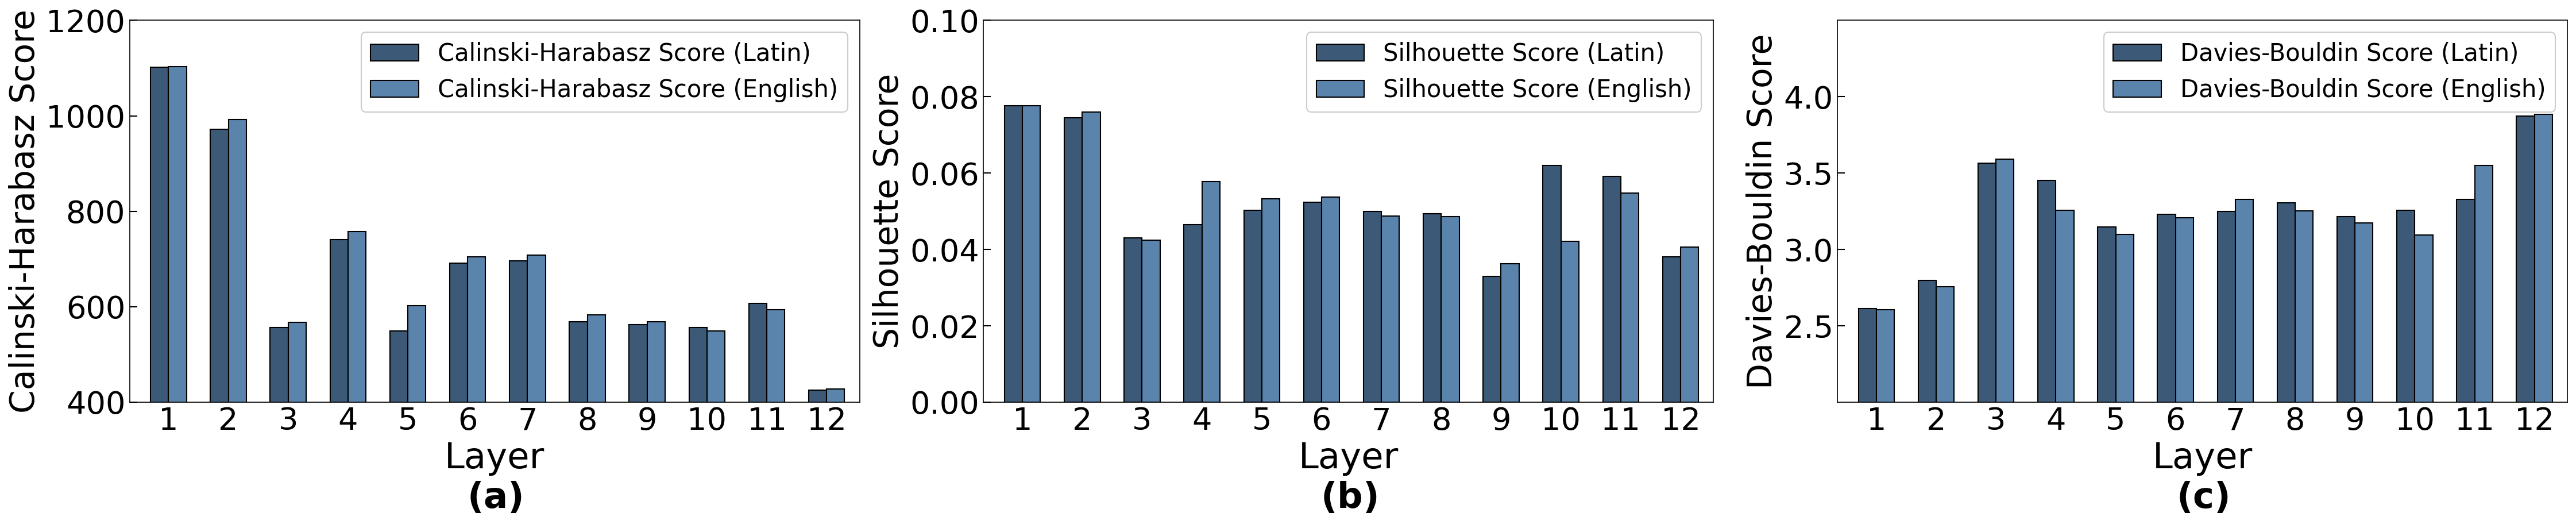

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Updated color scheme
colors = ['#3C5A78', '#5B84AD', '#F1F0E7']

# Create a figure with three subplots arranged horizontally
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 6.18), dpi=150)

# Plot 1: Silhouette Score
# Data
data1 = {
    'skewness': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'latin_silhouette_scores': [
        0.077608622610569,
        0.07442887872457504,
        0.043077290058135986,
        0.046486105769872665,
        0.05029585584998131,
        0.05230062082409859,
        0.050034478306770325,
        0.04939109459519386,
        0.0329284593462944,
        0.062023527920246124,
        0.0592050775885582,
        0.0381217859685421
    ]
}
df1 = pd.DataFrame(data1)

data2 = {
    'skewness': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'english_silhouette_scores': [
        0.0776643306016922,
        0.07595033198595047,
        0.04244108498096466,
        0.05772330239415169,
        0.05325742065906525,
        0.0536731518805027,
        0.04875301569700241,
        0.04857423156499863,
        0.03633827343583107,
        0.04209625720977783,
        0.05471765622496605,
        0.0406092032790184
    ]
}
df2 = pd.DataFrame(data2)

ax = axs[1]  # First subplot
width = 0.30  # Width of the bars
r1 = np.arange(len(df1['skewness']))  # Positions for the first set of bars
r2 = [x + width for x in r1]  # Positions for the second set of bars

ax.bar(
    r1,
    df1['latin_silhouette_scores'],
    color=colors[0],
    width=width,
    label='Silhouette Score (Latin)',
    edgecolor='black',
    linewidth=1
)
ax.bar(
    r2,
    df2['english_silhouette_scores'],
    color=colors[1],
    width=width,
    label='Silhouette Score (English)',
    edgecolor='black',
    linewidth=1
)

# Setting labels and title
ax.set_xlabel('Layer\n$\mathbf{(b)}$', fontsize=30)
ax.set_ylabel('Silhouette Score', fontsize=28)
ax.set_xticks([r + width / 2 for r in range(len(df1['skewness']))])
ax.set_xticklabels(df1['skewness'])
ax.set_xlim(min(r1) - 0.5, max(r1) + 0.7)

# Custom legend location
ax.legend(frameon=True, loc='upper right', fontsize=20, framealpha=1.0)

# Setting y-axis ticks
ax.tick_params(axis='both', which='both', direction='in', length=6, width=1, labelsize=26)
ax.tick_params(axis='x', which='both', bottom=False)

# Set y-axis range and ticks (show multiples of 0.02)
min_score = 0
max_score = max(df1['latin_silhouette_scores'].max(), df2['english_silhouette_scores'].max())
max_limit = np.ceil(max_score / 0.02) * 0.02
ax.set_ylim(min_score, max_limit + 0.02)
ax.set_yticks([0, 0.02, 0.04, 0.06, 0.08, 0.10])

# Plot 2: Calinski-Harabasz Index
# Data
data1 = {
    'skewness': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'latin_calinski_harabasz_scores': [
        1101.9970712928782,
        972.3377014796076,
        557.0454591785148,
        740.1664751939616,
        549.4409634140388,
        691.6700917687848,
        695.8288700069946,
        568.6682991015228,
        562.5051035242234,
        556.9191506412195,
        607.1551416164829,
        425.84878759201104
    ]
}
df1 = pd.DataFrame(data1)

data2 = {
    'skewness': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'english_calinski_harabasz_scores': [
        1102.5957387727747,
        992.676004372641,
        566.7492386295064,
        757.0295964996195,
        601.6525100603018,
        704.712302847327,
        708.0949763610871,
        583.3399866332046,
        568.7194160686018,
        548.721056455645,
        593.6960370094506,
        427.2665603303694
    ]
}
df2 = pd.DataFrame(data2)

ax = axs[0]  # Second subplot
ax.bar(
    r1,
    df1['latin_calinski_harabasz_scores'],
    color=colors[0],
    width=width,
    label='Calinski-Harabasz Score (Latin)',
    edgecolor='black',
    linewidth=1
)
ax.bar(
    r2,
    df2['english_calinski_harabasz_scores'],
    color=colors[1],
    width=width,
    label='Calinski-Harabasz Score (English)',
    edgecolor='black',
    linewidth=1
)

# Setting labels and title
ax.set_xlabel('Layer\n$\mathbf{(a)}$', fontsize=30)
ax.set_ylabel('Calinski-Harabasz Score', fontsize=28)
ax.set_xticks([r + width / 2 for r in range(len(df1['skewness']))])
ax.set_xticklabels(df1['skewness'])
ax.set_xlim(min(r1) - 0.5, max(r1) + 0.7)

# Custom legend location
ax.legend(frameon=True, loc='upper right', fontsize=20, framealpha=1.0)

# Setting y-axis ticks
ax.tick_params(axis='both', which='both', direction='in', length=6, width=1, labelsize=26)
ax.tick_params(axis='x', which='both', bottom=False)

# Set y-axis range and ticks
ax.set_ylim(400, 1200)
ax.set_yticks([400, 600, 800, 1000, 1200])

# Plot 3: Davies-Bouldin Score
# Data
data1 = {
    'skewness': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'latin_davies_bouldin_scores': [
        2.613957435717729,
        2.7989306512594854,
        3.5636599240479003,
        3.4538395981170793,
        3.1467590530070235,
        3.229054377662634,
        3.2497728633494427,
        3.305009222042612,
        3.2140085010156,
        3.257255608345859,
        3.327829720176772,
        3.8717409739579973
    ]
}
df1 = pd.DataFrame(data1)

data2 = {
    'skewness': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'english_davies_bouldin_scores': [
        2.604289374350751,
        2.7559826855898226,
        3.5901987999618457,
        3.2579318619413273,
        3.0977434553065875,
        3.206695392258632,
        3.326470394463253,
        3.251561200726914,
        3.172890332512143,
        3.0942363861326694,
        3.5509015866115785,
        3.8842806890990347
    ]
}
df2 = pd.DataFrame(data2)

ax = axs[2]  # Third subplot
ax.bar(
    r1,
    df1['latin_davies_bouldin_scores'],
    color=colors[0],
    width=width,
    label='Davies-Bouldin Score (Latin)',
    edgecolor='black',
    linewidth=1
)
ax.bar(
    r2,
    df2['english_davies_bouldin_scores'],
    color=colors[1],
    width=width,
    label='Davies-Bouldin Score (English)',
    edgecolor='black',
    linewidth=1
)

# Setting labels and title
ax.set_xlabel('Layer\n$\mathbf{(c)}$', fontsize=30)
ax.set_ylabel('Davies-Bouldin Score', fontsize=28)
ax.set_xticks([r + width / 2 for r in range(len(df1['skewness']))])
ax.set_xticklabels(df1['skewness'])
ax.set_xlim(min(r1) - 0.5, max(r1) + 0.7)

# Custom legend location
ax.legend(frameon=True, loc='upper right', fontsize=20, framealpha=1.0)

# Setting y-axis ticks
ax.tick_params(axis='both', which='both', direction='in', length=6, width=1, labelsize=26)
ax.tick_params(axis='x', which='both', bottom=False)

# Set y-axis range and ticks
ax.set_ylim(2.0, 4.5)
ax.set_yticks([2.5, 3.0, 3.5, 4.0])

plt.tight_layout()
plt.savefig('C:/Users/rzc/Desktop/fig/svg/Figure 8.svg', format='svg')
plt.savefig('C:/Users/rzc/Desktop/fig/png/Figure 8.png', format='png')
plt.savefig('C:/Users/rzc/Desktop/fig/jpeg/Figure 8.jpeg', format='jpeg')
plt.savefig('C:/Users/rzc/Desktop/fig/tif/Figure 8.tif', format='tif')
plt.show()